#### KNN - Visão geral

Para uma visão bem introdutória, veja: 
- https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e
- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

Para iniciar no tema vamos ao exemplo abaixo.

Antes de continuar no livro**, decidi estudar knn por fora para ter uma visão básica do tema.

Aula disponível em: 
- https://www.youtube.com/watch?v=xL2RK0QYtHc
- https://github.com/fea-dev-usp/ai-ws01-knn

** Ganesh, Tinniam V. Practical Machine Learning with R and Python: Machine Learning in Stereo (p. 99). Edição do Kindle. 

In [ ]:
import os
os.chdir("/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/RAIZ_Livro_ML_Tinnian_Ganesh/PracticalMachineLearningWithRandPython-3/Chapter4-RegressionofAContinuousVariable")
# os.chdir("C:/Users/70485992191/OneDrive/1. Educacao/INFO E ESTAT/Fernando DS - Python e R/Dados")
os.getcwd()
os.listdir()

['names.txt',
 '.DS_Store',
 'Boston.csv',
 'cap4.py',
 'knn_porFora.ipynb',
 'Data.csv',
 'foo1.png',
 'cap4.r',
 'crimes.csv',
 'foo.png',
 'RFunctions.R',
 'RandPython.Rmd',
 'auto_mpg.csv',
 'communities_data.csv']

#### 0. Importando as bibliotecas

In [ ]:
# Manipular/ver dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criar modelo ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# Plotar o modelo
from mlxtend.plotting import plot_decision_regions

#### 1. Importando os dados

In [ ]:
df = pd.read_csv("Data.csv", encoding="utf-8")
df.drop(["sl_no"], 1, inplace=True)

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df.describe(include=["object"])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


#### 2. Tratamento dos dados

Vamos separar os alunos em dois grupos: os que ganham salário acima e abaixo da mediana

In [ ]:
# Removendo linhas que possuem "Others" na coluna "degree_t", pois correspondem a uma parcela muito pequena, tendendo a ser muito mais uma "sujeira" nos dados
df = df[df["degree_t"] != "Others"]

In [ ]:
# Inserindo o 0 p/ salários faltantes
df["salary"].fillna(0, inplace=True)

In [ ]:
df["salary"].describe() # mediana de 240.000

count       204.000000
mean     202544.117647
std      154464.984840
min           0.000000
25%           0.000000
50%      240000.000000
75%      285500.000000
max      940000.000000
Name: salary, dtype: float64

Agora, vamos substituir os valores dos salários por valores binários, de acordo com classificação: 0 = abaixo da mediana; e: 1 >= mediana 

In [ ]:
df.loc[df["salary"] < 240000, "salary"] = 0
df.loc[df["salary"] >= 240000, "salary"] = 1

In [ ]:
df["salary"].unique()

array([1., 0.])

In [ ]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1.0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,0.0,0,1,1,0,...,0,1,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,1.0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,...,0,1,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,1.0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1


#### 3. Analisando os dados

##### 3.1 Matriz de correlação

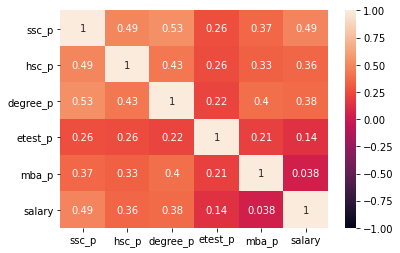

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

Chama a atenção que a variável 'Salary' possui correlaçãp média com as variáveis 'ssc_p' (nota média do ensino fundamental) e 'hsc_p' (ensino médio)

##### 3.2 Análise gráfica 
Variáveis que chamaram atençÃo

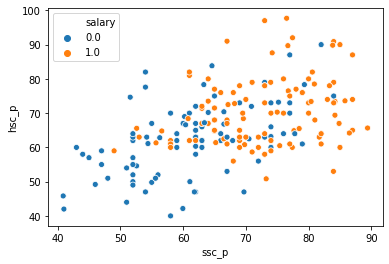

In [ ]:
sns.scatterplot(data=df, x="ssc_p", y="hsc_p", hue="salary")
# 0 = abaixo da mediana
# 1 = acima da mediana

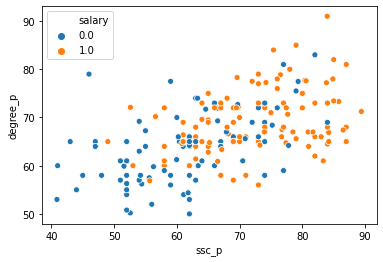

In [ ]:
sns.scatterplot(data=df, x="ssc_p", y="degree_p", hue="salary") # agora com a nota média da universidade "degree_p"
# 0 = abaixo da mediana
# 1 = acima da mediana

#### 4. Modelo KNN

Definir Features (X) e targets (y).

Em português: Características (X) e alvos (y)

In [ ]:
# Features: todas as colunas, exceto "salary"
# Importante: como se utiliza o numpy, deve ser um array (matriz)
X = np.array(df_dummy.drop(["salary"], 1))

# Target -- "salary"
y = np.array(df_dummy["salary"])

##### 4.1 Separando treino e teste

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

Como o algoritmo KNN depende muito das distâncias entre pontos, é bom normalizarmos nossos valores para aumentar nossa precisão.

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##### 4.2 Modelo de KNN

In [ ]:
# esqueleto do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors=19, metric="euclidean")

# o número de vizinhos pode ser escolhido conforme informações:  https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e
# 
# * In general, practice, choosing the value of k is k = sqrt(N) where N stands for the number of samples in your training dataset.

In [ ]:
# Treino do modelo
clf.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [ ]:
# Teste do modelo
accuracy = clf.score(X_test, y_test)
accuracy

0.926829268292683

##### 4.3 Visualizando a fronteira entre os tipos de dados

In [ ]:
def knn_comparison(data, k):
    x = data[["ssc_p", "hsc_p"]].values
    y = data["salary"].astype(int).values
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    plot_decision_regions(x, y, clf=knn)
    plt.xlabel("ssc_p")
    plt.ylabel("hsc_p")
    plt.title("K=" + str(k))
    plt.show()

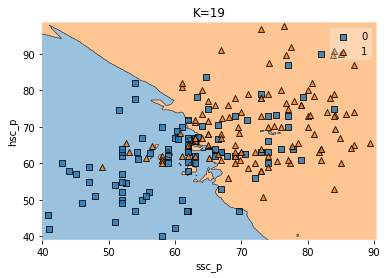

In [ ]:
knn_comparison(data=df_dummy, k=19)

##### 4.4 Como usar na prática?

In [ ]:
# Mostra a 1ª linha do dataset. O método .T transpõe a tabela, deixando-a na vertical
df_dummy.head(1).T # vendo a primeira linha com ela transposta em forma de coluna. Observe que como se trata do df com as features (características), a única entrada restante seria a variável "salary", que, no nosso caso, foi transformada em binária (acima ou abaixo da mediana)

,0
ssc_p,67.0
hsc_p,91.0
degree_p,58.0
etest_p,55.0
mba_p,58.8
salary,1.0
gender_F,0.0
gender_M,1.0
ssc_b_Central,0.0
ssc_b_Others,1.0


Vamos criar uma linha de exemplo (essa seria a linha com as características da pessoa que você quer prever).

Nosso exemplo deve ser um array do numpy, e posteriormente precisamos alterar seu formato com o método .reshape().

Note também que é necessário normalizar os números que você acabou de criar, usando o sc_X.transform(exemplo).

Por fim, use clf.predict(exemplo) para prever a faixa de renda da pessoa!

In [ ]:
# Dados da pessoa que queremos prever
exemplo = np.array([95,95,90,60,50,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0])

# Alterando seu formato
exemplo = exemplo.reshape(1,-1)

# Normalizar os números, que nem fizemos anteriormente
exemplo = sc_X.transform(exemplo)

# Prevendo sua faixa de renda.
predicao = clf.predict(exemplo)

print(predicao) # Se o resultado for 0, a pessoa ganha abaixo da mediana (240 mil). Se for 1, o contrário.

[1.]


In [ ]:
# testando Google Colab


In [ ]:
# Agora no VSCode do Windows